In [1]:
import seaborn as sb
DEFAULT_SEABORN_STYLE = "darkgrid"
sb.set_style(DEFAULT_SEABORN_STYLE)
from cycler import cycler
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf'])

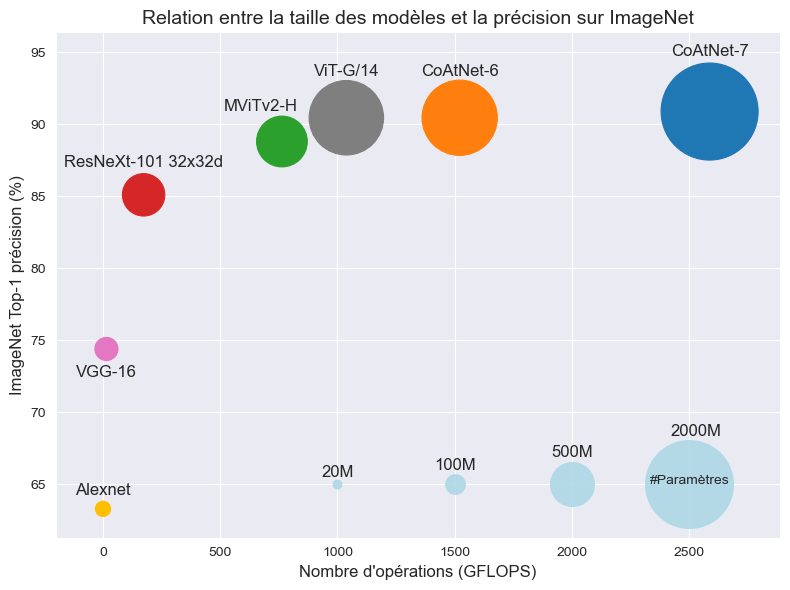

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
names = ["CoAtNet-7", "CoAtNet-6", "MViTv2-H", "ResNeXt-101 32x32d", "VGG-16", "ViT-G/14", "Alexnet"]
flops = [2586, 1521, 763.5, 174, 15.5, 1038, 1]
precisions = [90.88, 90.45, 88.8, 85.1, 74.4, 90.45,63.3]
sizes = [2440, 1470, 667, 466, 138, 1437, 60]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#e377c2', '#7f7f7f', '#FFBF00']

# Set up the plot
plt.figure(figsize=(8, 6))
scaling_factor = 2  # Adjust the scaling factor as desired
sizes = [size * scaling_factor for size in sizes]  # Scale the sizes
scatter = plt.scatter(flops, precisions, s=sizes, c=colors, alpha=1, linewidths=0.8)  # Use scatter plot for individual data points


# Add labels to each data point
for i, name in enumerate(names):
    if name=='Alexnet':
        plt.annotate(name, (flops[i], precisions[i]), xytext=(0, 10), textcoords='offset points', fontsize=12, ha='center')
    if name=='VGG-16':
        plt.annotate(name, (flops[i], precisions[i]), xytext=(0, -20), textcoords='offset points', fontsize=12, ha='center')
    if name=='ResNeXt-101 32x32d':
        plt.annotate(name, (flops[i], precisions[i]), xytext=(0, 20), textcoords='offset points', fontsize=12, ha='center')
    if name=='ViT-G/14':
        plt.annotate(name, (flops[i], precisions[i]), xytext=(0, 30), textcoords='offset points', fontsize=12, ha='center')
    if name=='MViTv2-H':
        plt.annotate(name, (flops[i], precisions[i]), xytext=(-15, 22), textcoords='offset points', fontsize=12, ha='center')
    if name=='CoAtNet-6':
        plt.annotate(name, (flops[i], precisions[i]), xytext=(0, 30), textcoords='offset points', fontsize=12, ha='center')
    if name=='CoAtNet-7':
        plt.annotate(name, (flops[i], precisions[i]), xytext=(0, 40), textcoords='offset points', fontsize=12, ha='center')
# Labels and title
plt.xlabel("Nombre d'opérations (GFLOPS)", fontsize=12)
plt.ylabel('ImageNet Top-1 précision (%)', fontsize=12)
plt.title('Relation entre la taille des modèles et la précision sur ImageNet', fontsize=14)
plt.ylim(min(precisions)-2, max(precisions) + 5.5)  # Adjust the upper limit of y-axis by adding some padding
plt.xlim(0-200, max(flops) + 300)  # Adjust the upper limit of y-axis by adding some padding

# Create a legend for point sizes
sizes_millions = [(1000,65,20), (1500, 65, 100), (2000,65,500), (2500,65,2000)]

legend_labels = [f'{size}M' for size in sizes_millions]
legend_handles = [plt.scatter(x, y, s=size * scaling_factor, c='#ADD8E6', alpha=0.9, linewidths=0.8) for x,y,size in sizes_millions]
for x,y,size in sizes_millions:
    if size == 2000:
        plt.annotate(f'#Paramètres', (x, y), xytext=(0, 0), textcoords='offset points', fontsize=10, ha='center')
    if size==20:
        plt.annotate(f'{size}M', (x, y), xytext=(0, 5), textcoords='offset points', fontsize=12, ha='center')
    if size==100:
        plt.annotate(f'{size}M', (x, y), xytext=(0, 10), textcoords='offset points', fontsize=12, ha='center')
    if size==500:
        plt.annotate(f'{size}M', (x, y), xytext=(0,20), textcoords='offset points', fontsize=12, ha='center')
    if size==2000: 
        plt.annotate(f'{size}M', (x, y), xytext=(5, 35), textcoords='offset points', fontsize=12, ha='center')


# save figure
plt.savefig('images/relationtailleprecision.png', format='png', dpi=600, bbox_inches='tight')
# Show the plot
plt.tight_layout()
plt.show()



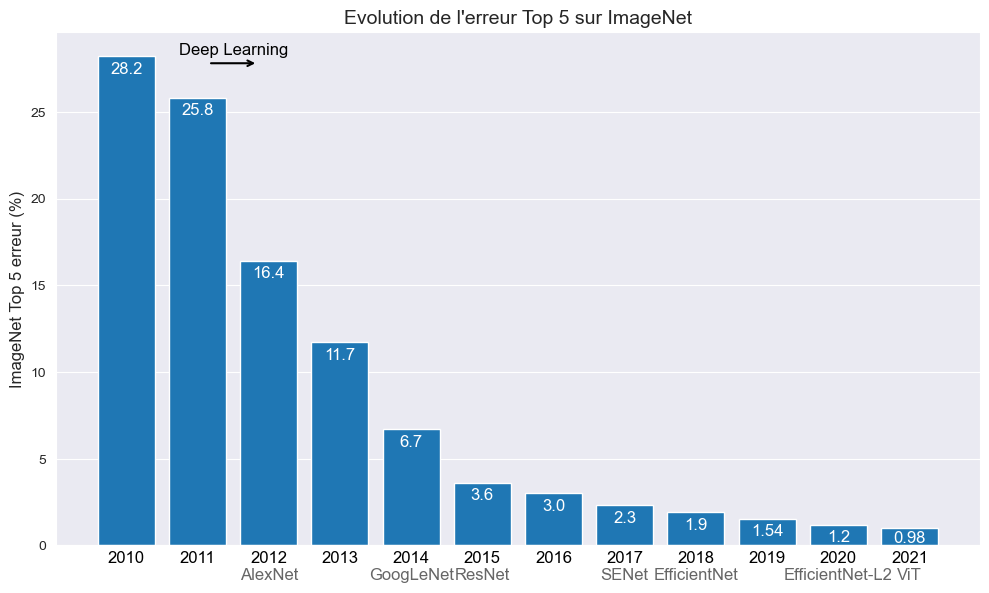

In [3]:
import matplotlib.pyplot as plt

# Data for the bar chart
top5_year = [(2010, 28.2), (2011, 25.8), (2012, 16.4), (2013, 11.7), (2014, 6.7),
             (2015, 3.6), (2016, 3.0), (2017, 2.3), (2018, 1.9), (2019, 1.54),
             (2020, 1.2), (2021, 0.98)]

# Extracting the years and values separately
years = [item[0] for item in top5_year]
values = [item[1] for item in top5_year]

# Increase the width and adjust the figure size
bar_width = 0.8
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(years, values, color='#1f77b4', width=bar_width)

# Labeling the axes and giving a title
ax.set_ylabel('ImageNet Top 5 erreur (%)', fontsize=12)  
ax.set_title("Evolution de l'erreur Top 5 sur ImageNet", fontsize=14)  

# Remove the x-axis ticks
ax.set_xticks([])

# Naming each bar
for i in range(len(years)):
    if years[i] == 2021:
         ax.text(years[i], values[i] - 0.8, str(values[i]), color='white', ha='center', fontsize=12)
    else:
        ax.text(years[i], values[i] - 0.98, str(values[i]), color='white', ha='center', fontsize=12)
    ax.text(years[i], -1, str(years[i]), color='black', ha='center', fontsize=12)
    if years[i] == 2012:
        ax.text(years[i], -2, 'AlexNet', color='black', ha='center', fontsize=12, alpha=0.6)  
    if years[i] == 2014:
        ax.text(years[i], -2, 'GoogLeNet', color='black', ha='center', fontsize=12, alpha=0.6)
    if years[i] == 2015:
        ax.text(years[i], -2, 'ResNet', color='black', ha='center', fontsize=12, alpha=0.6)
    if years[i] == 2017:
        ax.text(years[i], -2, 'SENet', color='black', ha='center', fontsize=12, alpha=0.6)
    if years[i] == 2018:
        ax.text(years[i], -2, 'EfficientNet', color='black', ha='center', fontsize=12, alpha=0.6)
    if years[i] == 2020:
        ax.text(years[i], -2, 'EfficientNet-L2', color='black', ha='center', fontsize=12, alpha=0.6)
    if years[i] == 2021:
        ax.text(years[i], -2, 'ViT', color='black', ha='center', fontsize=12, alpha=0.6)

# Adding the arrow
arrow_start = (years[1]+0.15, values[1]+2)
arrow_end = (years[2]-0.15, values[1]+2)
ax.annotate('', arrow_end, arrow_start, arrowprops={'arrowstyle': '->', 'lw': 1.5, 'color': 'black'})
ax.text(years[1] + (years[2] - years[1]) / 2, values[1] + 2.5, 'Deep Learning', color='black', ha='center', fontsize=12)

# Adjusting the layout
fig.tight_layout()
# Lowering the x-axis label
ax.xaxis.set_label_coords(0.5, -0.08)
# Displaying the chart
plt.savefig('images/evolutionImageneterreur.png', format='png', dpi=600, bbox_inches='tight')
plt.show()
